In [19]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
sns.set(style="dark")
plt.rcParams.update({'font.size': 8})

In [39]:
def process_data(env_path, N=20):
    data = []
    min_size = np.inf
    for path in glob.glob(env_path + '*/'):
        data_set = pickle.load(open(path + 'reward_data.pkl', 'rb'),encoding="bytes")

        data_set = np.stack(data_set)
        if data_set[-1,0] < min_size:
            min_size = data_set[-1,0]
        data.append(data_set)

    x_samples = np.linspace(0, min_size, N)
    interp_data = []
    for data_set in data:
        _x = data_set[:,0]
        _y = data_set[:,1]

        interp_data.append(np.interp(x_samples, _x, _y))
        
    mean = np.mean(interp_data, axis=0)
    std  = np.std(interp_data, axis=0)

    data_log = {'x' : x_samples, 'mean' : mean, 'std' : std, 
                'max' : np.max(interp_data, axis=0),
                'min' : np.min(interp_data, axis=0),
                '-std' : mean-std,
                '+std' : mean+std, 'data' : interp_data}
    
    return data_log

def plot_data(ax, log, label):
    ax.plot(log['x'], log['mean'], label=label)
    ax.fill_between(log['x'], 
                    log['-std'], log['+std'],
                    alpha=0.2)

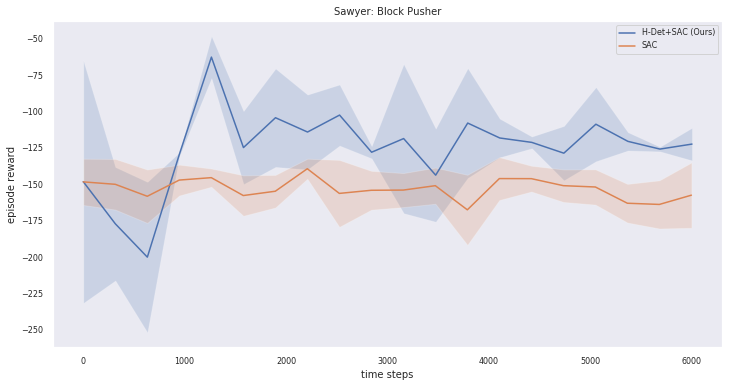

In [82]:
fig, axs = plt.subplots(1, 1, figsize=(12,6))

hsac_data = process_data('./sawyer/h_sac/')
sac_data = process_data('./sawyer/sac/')

plot_data(axs, hsac_data, 'H-Det+SAC (Ours)')
plot_data(axs, sac_data, 'SAC')

axs.set_title('Sawyer: Block Pusher', fontsize=10)

axs.tick_params(axis='both', which='major', labelsize=8)
axs.set_xlabel('time steps', fontsize=10)
axs.set_ylabel('episode reward', fontsize=10)
axs.legend(fontsize=8)